In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


In [2]:
def plot_scaler(data, col, categories=None , rates=None, c=None, X_scaled=None):
    scaler = StandardScaler()
    print(f'Columns: {[x for x in col if x not in rates]}')
    if categories is None and X_scaled is None:
        X_scaled = scaler.fit_transform(data[col])
    elif X_scaled is None:
        col = [x for x in col if x not in rates]
        X_scaled = scaler.fit_transform(data[col])

    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)
    explained_variance_ratio = pca.explained_variance_ratio_
    cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
    print(f'Cumulative variance ratio for 2 components: {cumulative_variance_ratio[1]*100:.2f}%')
    print(f'component 3: {explained_variance_ratio[2]*100:.2f}%')

    fig, ax = plt.subplots(3, 3, figsize=(16, 12))
    ax[0, 0].bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)
    ax[0, 0].set_xlabel('Principal Component')
    ax[0, 0].set_ylabel('Explained Variance Ratio')
    ax[0, 0].set_title('Explained Variance Ratio by Principal Component')
    
    ax[0, 1].plot(range(1, len(pca.explained_variance_ratio_) + 1), cumulative_variance_ratio)
    ax[0, 1].set_xlabel('Number of components')
    ax[0, 1].set_ylabel('Cumulative explained variance')
    ax[0, 1].set_title('Scree Plot')


    feature_names = data[col].columns
    if len(feature_names) > 2:
        for i in range(len(feature_names)):
            ax[1, 0].arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
                           head_width=0.05, head_length=0.05, color='blue')
    
        for i, feature in enumerate(feature_names):
            ax[1, 0].text(pca.components_[0, i] * 1.15, pca.components_[1, i] * 1.15, feature,
                          color='black', ha='center', va='center')
    
        ax[1, 0].set_xlim(-1, 1)
        ax[1, 0].set_ylim(-1, 1)
        ax[1, 0].set_xlabel('Principal Component 1')
        ax[1, 0].set_ylabel('Principal Component 2')
        ax[1, 0].set_title('Correlation Circle')
        ax[1, 0].grid()
        
        for i in range(len(feature_names)):
            ax[1, 1].arrow(0, 0, pca.components_[0, i], pca.components_[2, i], 
                           head_width=0.05, head_length=0.05, color='blue')
        for i, feature in enumerate(feature_names):
            ax[1, 1].text(pca.components_[0, i] * 1.15, pca.components_[2, i] * 1.15, feature,
                          color='black', ha='center', va='center')
        ax[1, 1].set_xlim(-1, 1)
        ax[1, 1].set_ylim(-1, 1)
        ax[1, 1].set_xlabel('Principal Component 1')
        ax[1, 1].set_ylabel('Principal Component 2')
        ax[1, 1].set_title('Correlation Circle')
        ax[1, 1].grid()
        
        for i in range(len(feature_names)):
            ax[1, 2].arrow(0, 0, pca.components_[0, i], pca.components_[3, i], 
                           head_width=0.05, head_length=0.05, color='blue')
        for i, feature in enumerate(feature_names):
            ax[1, 2].text(pca.components_[0, i] * 1.15, pca.components_[3, i] * 1.15, feature,
                          color='black', ha='center', va='center')
        ax[1, 2].set_xlim(-1, 1)
        ax[1, 2].set_ylim(-1, 1)
        ax[1, 2].set_xlabel('Principal Component 1')
        ax[1, 2].set_ylabel('Principal Component 2')
        ax[1, 2].set_title('Correlation Circle')
        ax[1, 2].grid()

        scatter = ax[2, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=c, alpha=0.5)
        ax[2, 0].set_xlabel('First principal component')
        ax[2, 0].set_ylabel('Second principal component')
        ax[2, 0].set_title('Projection of Individuals')
        # cbar = plt.colorbar(scatter, ax=ax[1, 1])
        scatter = ax[2, 1].scatter(X_pca[:, 0], X_pca[:, 2], c=c, alpha=0.5)
        ax[2, 1].set_xlabel('First principal component')
        ax[2, 1].set_ylabel('Third principal component')
        ax[2, 1].set_title('Projection of Individuals')
        # cbar = plt.colorbar(scatter, ax=ax[2, 0])
        scatter = ax[2, 2].scatter(X_pca[:, 1], X_pca[:, 2], c=c, alpha=0.5)
        ax[2, 2].set_xlabel('First principal component')
        ax[2, 2].set_ylabel('Forth principal component')
        ax[2, 2].set_title('Projection of Individuals')
        # cbar = plt.colorbar(scatter, ax=ax[2, 1])
    plt.tight_layout()
    plt.show()
    return X_scaled , X_pca

In [3]:
def create_boxplot(ax, data, col):
    sns.boxplot(x=data[col], ax=ax)
    ax.set_title(f'Distribution of {col}')

def plot_boxplots(data, columns):
    numCols = len(columns)
    numRows = numCols // 3 + (numCols % 3 > 0)
    
    fig, axes = plt.subplots(numRows, 3, figsize=(15, 5 * numRows))
    axes = np.array(axes).flatten()
    
    list(map(create_boxplot, axes[:numCols], [data]*numCols, columns))
    
    plt.tight_layout()
    plt.show()

In [4]:
def plot_pairplots(data, col):
	sns.set_theme(style="ticks")
	sns.pairplot(data[col], diag_kind="kde", markers="o", plot_kws={'alpha': 0.6})
	plt.tight_layout()
	plt.show()

In [5]:
def plot_scatterplot(data, col, c=None):
    fig, ax = plt.subplots(1, 1, figsize=(16, 6))
    ax.scatter(data[col[0]], data[col[1]], c=c, alpha=0.5)
    ax.set_xlabel(col[0])
    ax.set_ylabel(col[1])
    ax.set_title('Scatter Plot')
    plt.show()

In [3]:
def agglomerative_clustering_n(X_scaled):
    silhouette_list = []
    cluster_sizes_list = []
    best_score = -1
    n_clusters_range = range(3, 15)
    
    for n_clusters in n_clusters_range:
        model = AgglomerativeClustering(n_clusters=n_clusters)
        clusters = model.fit_predict(X_scaled)
        
        silhouette_avg = silhouette_score(X_scaled, clusters)
        silhouette_list.append(silhouette_avg)
        cluster_sizes = np.bincount(clusters)
        cluster_sizes_list.append(cluster_sizes)
        print(f'Nombre de clusters: {cluster_sizes}, Silhouette score: {silhouette_avg:.2f}')

        if silhouette_avg > best_score:
            best_clusters = clusters
            best_model = model
            best_score = silhouette_avg

    return best_clusters, best_model

In [7]:
def kmeans_n(X_scaled):
    silhouette_list = []
    cluster_sizes_list = []
    best_score = -1
    for i in range(3, 15):
        kmeans = KMeans(n_clusters=i, random_state=0)
        clusters = kmeans.fit_predict(X_scaled)
        silhouette_avg = silhouette_score(X_scaled, clusters, n_jobs=-1)
        silhouette_list.append(silhouette_avg)
        cluster_sizes = np.bincount(clusters)  
        print(f'cluster size: {cluster_sizes} Silhouette score: {silhouette_avg:.2f}')
        cluster_sizes_list.append(cluster_sizes)
        if silhouette_avg > best_score:
                best_cluster = clusters
                best_kmeans = kmeans
                best_score = silhouette_avg
    return best_cluster, best_kmeans
        
    

In [17]:
def dbscan_n(X_scaled):
    silhouette_list = []
    cluster_sizes_list = []
    best_score = -1
    eps_values = np.linspace(0.1, 1.1, num=10)
    for eps in eps_values:
        model = DBSCAN(eps=eps, min_samples=200)
        clusters = model.fit_predict(X_scaled)
        if len(set(clusters)) > 1:
            silhouette_avg = silhouette_score(X_scaled, clusters, n_jobs=-1)
            silhouette_list.append(silhouette_avg)
            cluster_sizes = len(set(clusters)) - (1 if -1 in clusters else 0)
            cluster_sizes_list.append(cluster_sizes)
            print(f'cluster size: {cluster_sizes} Silhouette score: {silhouette_avg:.2f}')
        if silhouette_avg > best_score:
                best_clusters = clusters
                best_model = model
                best_score = silhouette_avg
    return best_clusters, best_model
            
    

In [5]:
# X_scaled = pd.read_csv('X_scaled.csv')
X_compressed = pd.read_csv('X_compressed.csv')
# df = pd.read_csv('df_grouped.csv')
# X = df.iloc[:,1:]
# features = X.columns
# rates = ['credit_card_rate', 'boleto_rate', 'voucher_rate', 'debit_card_rate']
# rfm = ['recency', 'frequency', 'monetary']
# profile = ['average_review_score', 'nb_of_different_sellers']

cluster size: [50880 18973 25566] Silhouette score: 0.35
cluster size: [47683 18321 24306  5109] Silhouette score: 0.41
cluster size: [47684 18315 24294  3652  1474] Silhouette score: 0.43
cluster size: [46704 18149 23690  1874  1469  3533] Silhouette score: 0.44
cluster size: [39036 18147  2975  1777  1468  3468 28548] Silhouette score: 0.46
cluster size: [26364 18146 15646  1465  2973  3469 25663  1693] Silhouette score: 0.40
cluster size: [26367  7722 15647  1465  2973  3467 25656  1683 10439] Silhouette score: 0.37
cluster size: [25927  7677 15440  1466  2968  3094 25286  1552 10344  1665] Silhouette score: 0.38
cluster size: [25927  7677 15440  1425  2968    49 25287  1552 10344  1665  3085] Silhouette score: 0.38
cluster size: [25416  7656 15070  1424  2967    49 24561  2777 10334  1658  3098   409] Silhouette score: 0.40
cluster size: [25265  7656   867  1424  2345    49 24476  2758 10332  1657  3099   398
 15093] Silhouette score: 0.39
cluster size: [25265  7656   867  1423  23

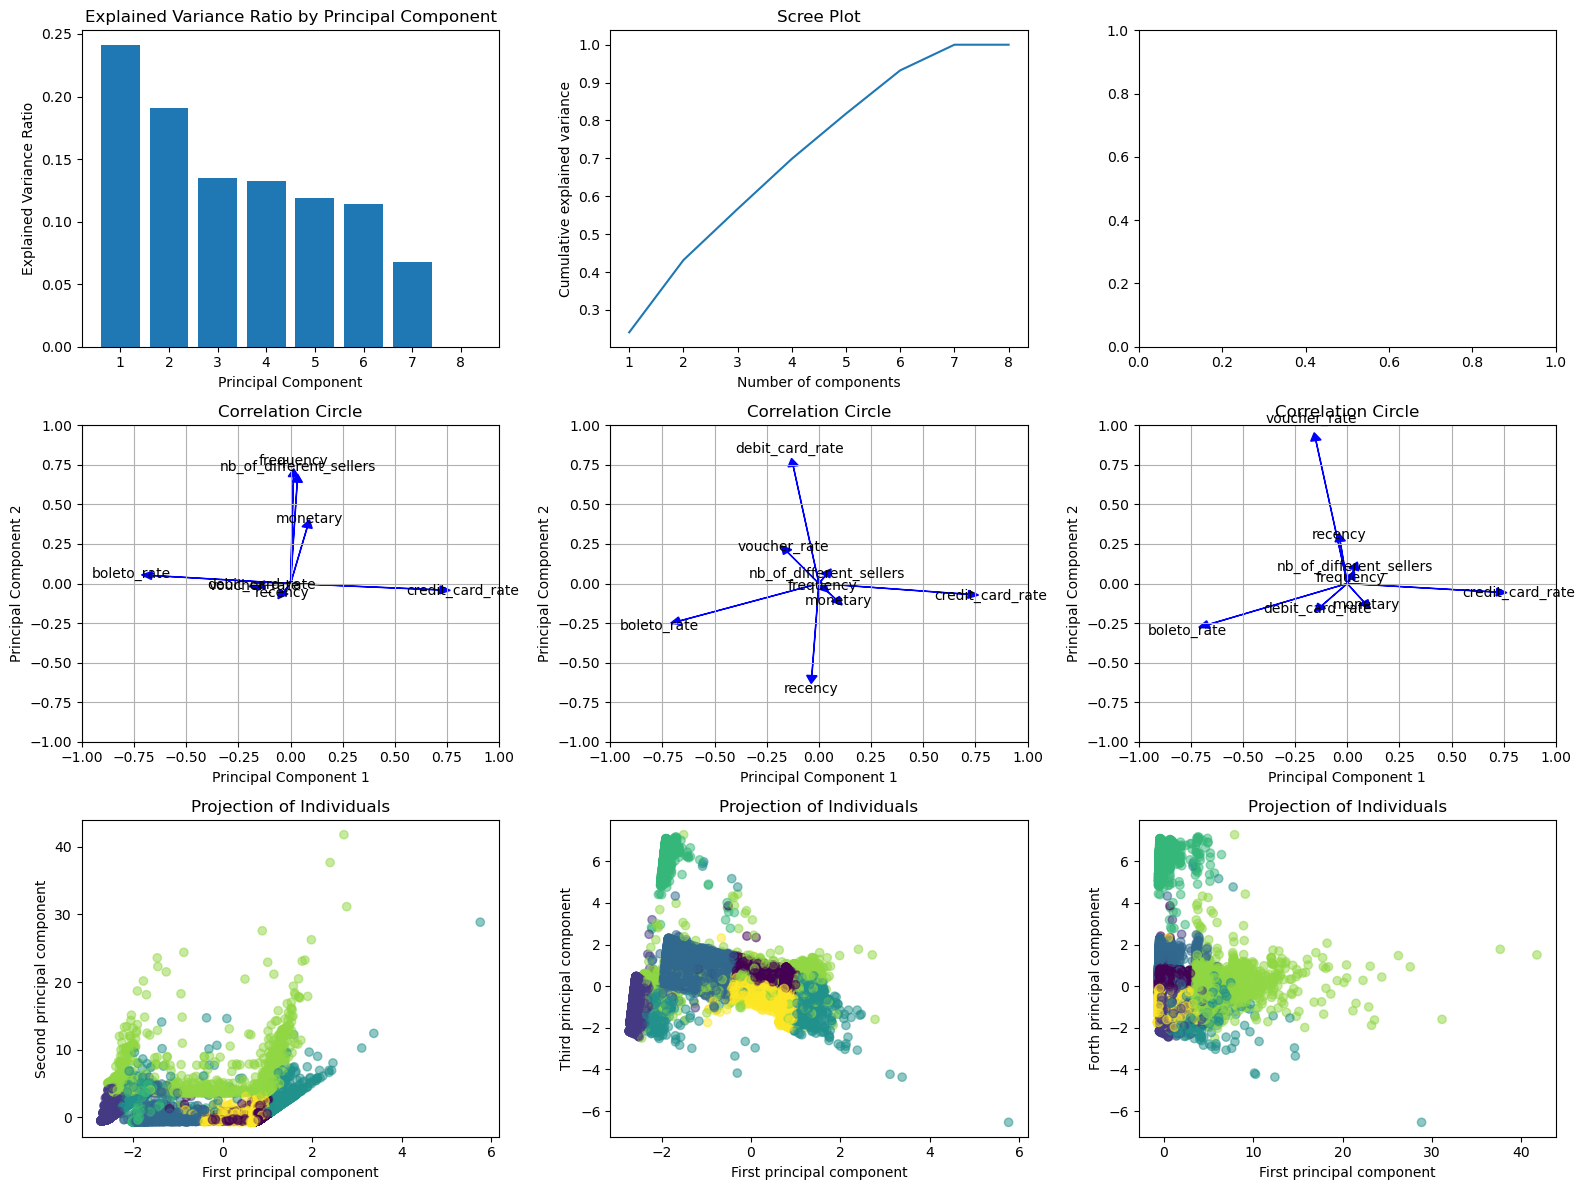

In [9]:
clusters, kmeans = kmeans_n(X_scaled)
plot_scaler(X, features, categories=None, rates=rates, c=clusters, X_scaled=X_scaled)
print("\n")

cluster size: 3 Silhouette score: 0.14
cluster size: 4 Silhouette score: 0.29
cluster size: 6 Silhouette score: 0.32
cluster size: 7 Silhouette score: 0.33
cluster size: 8 Silhouette score: 0.34
cluster size: 8 Silhouette score: 0.35
cluster size: 8 Silhouette score: 0.36
cluster size: 8 Silhouette score: 0.37
cluster size: 8 Silhouette score: 0.37
cluster size: 9 Silhouette score: 0.37
Columns: ['nb_of_different_sellers', 'recency', 'frequency', 'monetary']
Cumulative variance ratio for 2 components: 43.14%
component 3: 13.51%


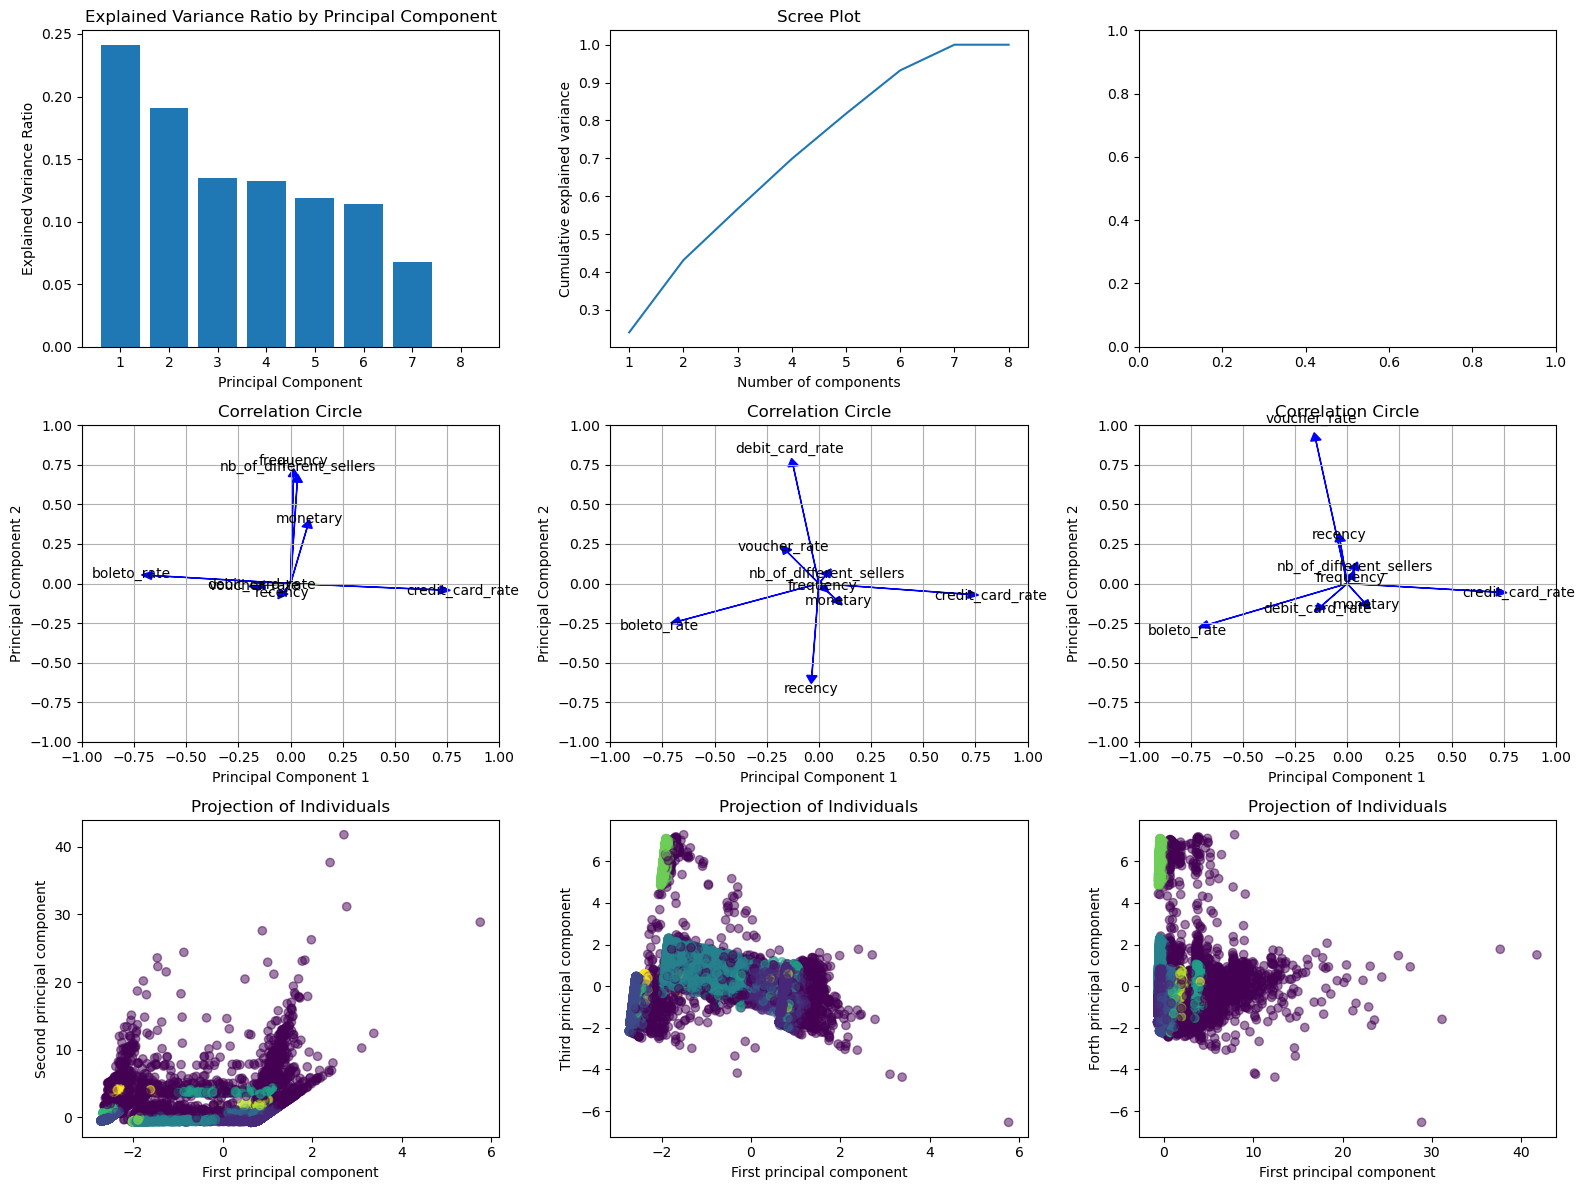

In [18]:
clusters, model = dbscan_n(X_scaled)
plot_scaler(X, features, categories=None, rates=rates, c=clusters, X_scaled=X_scaled)
print("\n")

In [7]:
print(X_compressed.shape)
data = X_compressed.iloc[:,0:3]
clusters, model = agglomerative_clustering_n(data)
plot_scaler(X, features, categories=None, rates=rates, c=clusters, X_scaled=X_scaled)
print("\n")

(95419, 8)


: 